In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
# import merged dataset
df1 = pd.read_csv('data_sources/merge_data.csv')
# check dataset
df1.head()

,Unnamed: 0,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,White,Black,Native,Asian,Other,Total,Diversity Index
0,0,76574,Taylor,Williamson County,Rural,North,106847.78,2011,17213,35.3,54.0,8.6,0.0,1.8,0.3,100.0,0.576062
1,1,76574,Taylor,Williamson County,Rural,North,106776.56,2012,17775,34.5,53.6,8.9,0.0,2.0,1.0,100.0,0.585258
2,2,76574,Taylor,Williamson County,Rural,North,107119.61,2013,18037,36.8,51.1,9.8,0.0,0.2,2.2,100.1,0.593363
3,3,76574,Taylor,Williamson County,Rural,North,107849.07,2014,18135,35.3,51.9,9.9,0.0,0.4,2.5,100.0,0.595588
4,4,76574,Taylor,Williamson County,Rural,North,109096.49,2015,18281,41.4,46.0,9.6,0.1,0.7,2.1,99.9,0.607297


In [3]:
# let's look at diversity index change in all zip codes over time
diversityS = df1.groupby('Year')['Diversity Index'].mean()
df2 = diversityS.to_frame()
df2.head(10)

,Diversity Index
Year,
2011,0.474033
2012,0.479876
2013,0.480438
2014,0.490309
2015,0.492769
2016,0.496741
2017,0.501808


In [4]:
# let's look at the home value change in all zip codes over time
valueS = df1.groupby('Year')['Value'].mean()
valueS
df3 = valueS.to_frame()
df3.head(100)

,Value
Year,
2011,205454.297500
2012,206402.864028
2013,207956.080000
2014,210376.890139
2015,213723.325694
2016,217966.157361
2017,222740.200694


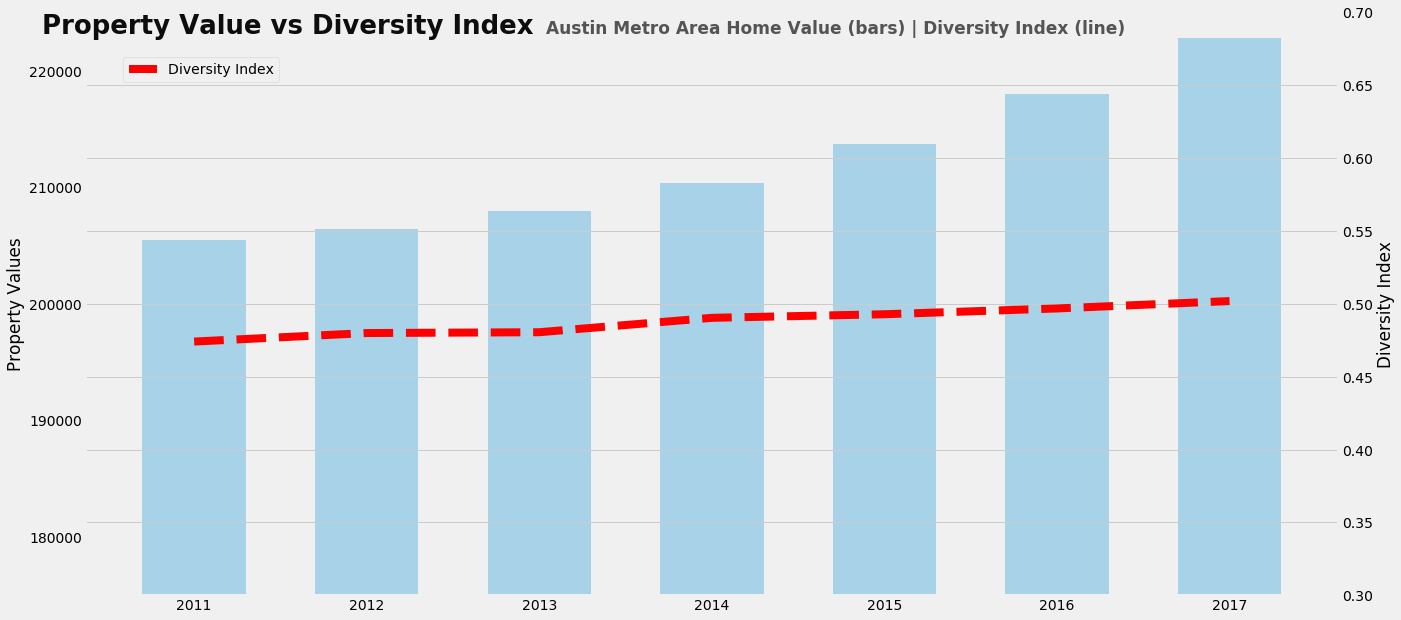

In [5]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots()

# bar chart for property values
ax1.bar(df3.index, df3.Value, alpha=0.3, width=0.6)
ax1.set_ylim(175000,225000)

# the line chart
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(df2['Diversity Index'], 'r-', linewidth = 8, linestyle = '--')
ax2.set_ylim(0.3, 0.7)

ax1.grid(b=False) # turn off grid #2
 
#ax1.set_title('Property Values vs Diversity')

ax1.set_ylabel('Property Values')
#ax1.set_yticklabels(labels = ['$180k','$190k','$200k','$210k','$220k','$230k','$240k'])
ax2.set_ylabel('Diversity Index')
#ax2.set_yticklabels(labels = ['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])

textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(0.05, 0.85, s = "Property Value vs Diversity Index",
               fontsize=26, weight='bold', alpha= .95, transform=plt.gcf().transFigure)
 
plt.text(0.4, 0.85, s = "Austin Metro Area Home Value (bars) | Diversity Index (line)",
               fontsize=17, weight='bold', alpha= .65, transform=plt.gcf().transFigure)
plt.legend(loc=(.03,0.88))
plt.savefig('images/05-01-billy-value-diversity-all.png')
plt.show()


In [6]:
## Data specifically show central east Austin

dfEAst = pd.DataFrame()

EastZipList = ['78723', '78754', '78722', '78702', '78721', '78741', '78742']

dfEast = df1.loc[df1['Zip'].isin(EastZipList)]

dfEast['Black & Hispanic'] = dfEast['Black'] + dfEast['Hispanic'] 
dfEast['Asian & Other'] = dfEast['Asian'] + dfEast['Other']


dfEast = dfEast.groupby(['Year'])['Value', 'Diversity Index', 'Black', 'Hispanic', 'Black & Hispanic', 'White', 'Asian & Other'].mean()
dfEast.head()


,Value,Diversity Index,Black,Hispanic,Black & Hispanic,White,Asian & Other
Year,,,,,,,
2011,162633.148333,0.612411,19.083333,45.633333,64.716667,29.333333,5.783333
2012,164253.820000,0.616789,18.833333,44.600000,63.433333,30.183333,6.150000
2013,166564.870000,0.617112,17.866667,44.533333,62.400000,30.733333,6.650000
2014,169775.848333,0.627004,17.933333,43.483333,61.416667,31.750000,6.533333
2015,174063.961667,0.630872,17.533333,43.066667,60.600000,32.016667,7.216667


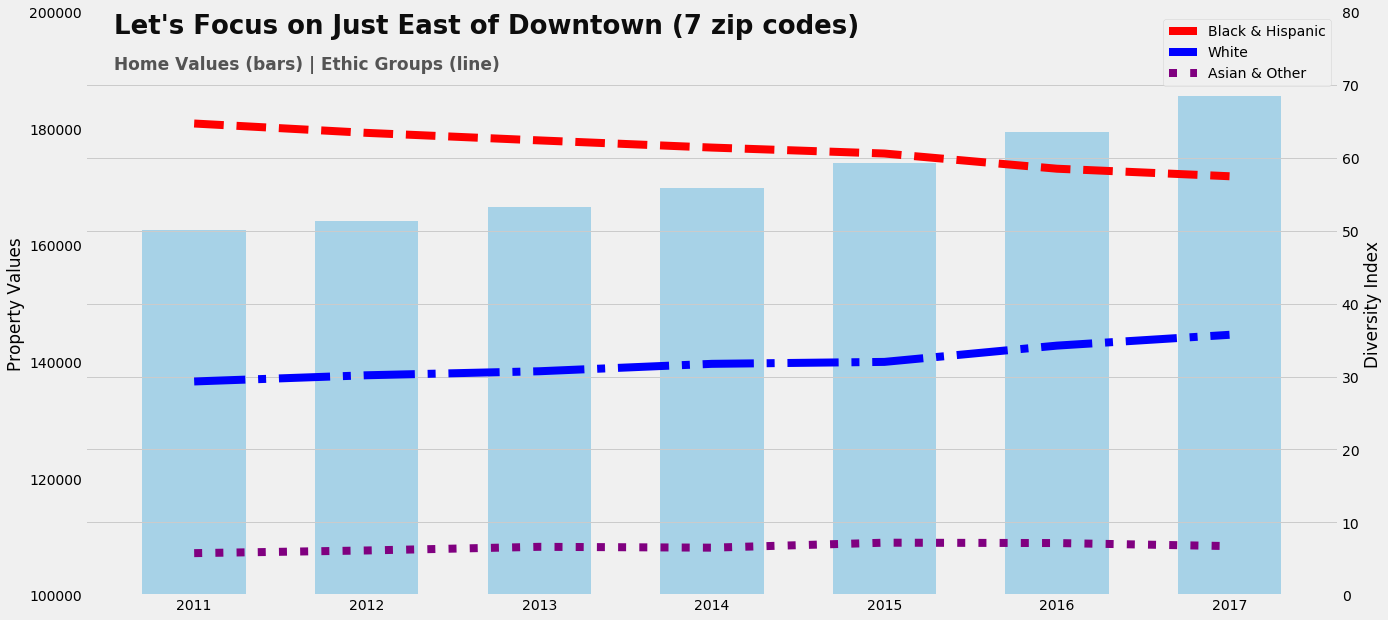

In [7]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots()

# bar chart for property values
ax1.bar(dfEast.index, dfEast.Value, alpha=0.3, width=0.6)
ax1.set_ylim(100000,200000)

# the line chart
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(dfEast['Black & Hispanic'], 'r-', linewidth = 8, linestyle='--')
ax2.plot(dfEast['White'], c='blue', linewidth = 8, linestyle='-.')
ax2.plot(dfEast['Asian & Other'], c='purple', linewidth = 8, linestyle=':')
ax2.set_ylim(0,80)

ax1.grid(b=False) # turn off grid #2
 
#ax1.set_title('Property Values vs Diversity')

ax1.set_ylabel('Property Values')
#ax1.set_yticklabels(labels = ['$130k','$140k','$150k','$160k','$170k','$180k','$190k','$200k'])
ax2.set_ylabel('Diversity Index')
#ax2.set_yticklabels(labels = ['0%','10%','20%','30%','40%','50%','60%','70%','80%'])

plt.text(0.1, 0.85, s = "Let's Focus on Just East of Downtown (7 zip codes)",
               fontsize=26, weight='bold', alpha= .95, transform=plt.gcf().transFigure)
 
plt.text(0.1, 0.8, s = "Home Values (bars) | Ethic Groups (line)",
               fontsize=17, weight='bold', alpha= .65, transform=plt.gcf().transFigure)
plt.legend()
plt.savefig('images/05-02-billy-east-central-only.png')
plt.show()

Here are some notes:

1- Zip map:
https://www.google.com/search?q=austin+zip+map&tbm=isch&source=univ&sa=X&ved=2ahUKEwij6vb20frgAhVsja0KHfHdAO0QsAR6BAgFEAE&biw=2560&bih=1337#imgrc=5lVAXSfq9wB34M:



In [8]:
## Data specifically show central east Austin
dfEAst = pd.DataFrame()
zipList = [78722]
dfEast = df1.loc[df1['Zip'].isin(zipList)]

dfEast['Black & Hispanic'] = dfEast['Black'] + dfEast['Hispanic'] 
dfEast['Asian & Other'] = dfEast['Asian'] + dfEast['Other']

dfEast = dfEast.groupby(['Year'])['Value', 'Diversity Index', 'Black', 'Hispanic', 'Black & Hispanic', 'White', 'Asian & Other'].mean()
dfEast.head(25)

,Value,Diversity Index,Black,Hispanic,Black & Hispanic,White,Asian & Other
Year,,,,,,,
2011,217041.11,0.570610,13.0,21.3,34.3,60.5,4.6
2012,220266.67,0.553663,13.5,19.1,32.6,62.5,4.1
2013,224072.06,0.541623,10.1,20.1,30.2,63.7,5.4
2014,229009.72,0.558645,11.0,20.1,31.1,62.2,5.9
2015,235786.40,0.558768,12.1,16.5,28.6,62.9,8.5
2016,242723.33,0.539237,13.2,14.3,27.5,64.8,7.6
2017,249907.54,0.508776,11.6,13.4,25.0,67.6,7.4


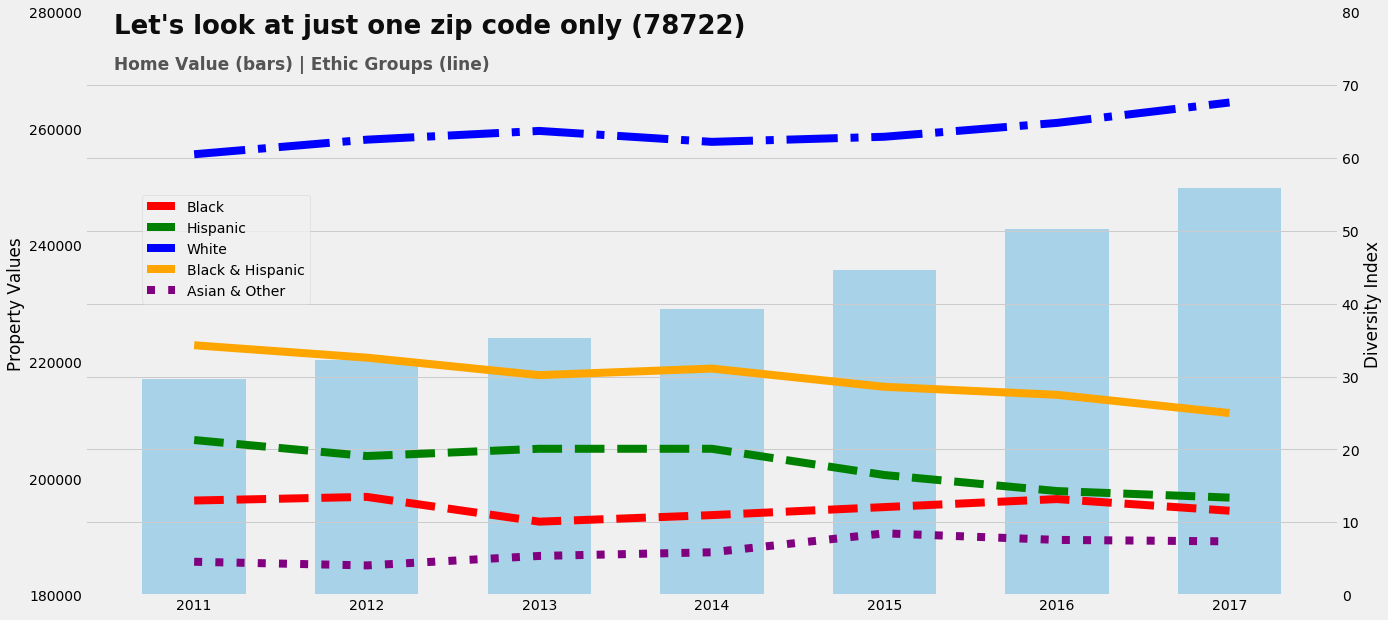

In [11]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots()

# bar chart for property values
ax1.bar(dfEast.index, dfEast.Value, alpha=0.3, width=0.6)
ax1.set_ylim(180000,280000)

# the line chart
ax2 = ax1.twinx()  # set up the 2nd axis
ax2.plot(dfEast['Black'], 'r-', linewidth = 8, linestyle='--')
ax2.plot(dfEast['Hispanic'], 'green', linewidth = 8, linestyle='--')
ax2.plot(dfEast['White'], c='blue', linewidth = 8, linestyle='-.')
ax2.plot(dfEast['Black & Hispanic'], c='orange', linewidth = 8)
ax2.plot(dfEast['Asian & Other'], c='purple', linewidth = 8, linestyle=':')
ax2.set_ylim(0,80)

ax1.grid(b=False) # turn off grid #2
 
#ax1.set_title('Property Values vs Diversity')

ax1.set_ylabel('Property Values')
#ax1.set_yticklabels(labels = ['$180k','$140k','$150k','$160k','$170k','$180k','$190k','$200k'])
ax2.set_ylabel('Diversity Index')
#ax2.set_yticklabels(labels = ['0%','10%','20%','30%','40%','50%','60%','70%','80%'])

plt.text(0.1, 0.85, s = "Let's look at just one zip code only (78722)",
               fontsize=26, weight='bold', alpha= .95, transform=plt.gcf().transFigure)
 
plt.text(0.1, 0.8, s = "Home Value (bars) | Ethic Groups (line)",
               fontsize=17, weight='bold', alpha= .65, transform=plt.gcf().transFigure)
plt.legend(loc=(.045,0.5))
plt.savefig('images/05-03-billy-78722-graph.png')
plt.show()

In [12]:
a = dfEast['Black & Hispanic']
b = dfEast['Value']
linregress(a, b)

LinregressResult(slope=-3720.172417840378, intercept=342491.2738648559, rvalue=-0.9688170714695908, pvalue=0.0003243039756793674, stderr=425.4978954053012)